In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('/content/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# ***Data Cleaning***

In [66]:
df = data.drop(columns=['parental level of education'], axis = 1)

In [67]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
total_score,0
average_score,0


In [68]:
df.duplicated().sum()

1

In [69]:
df['test preparation course'].value_counts()

,count
test preparation course,
1,642
0,358


In [70]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
2,319
3,262
1,190
4,140
0,89


In [71]:
df['lunch'].value_counts()

,count
lunch,
1,645
0,355


# ***Data Pre-processing***

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [72]:
df['gender'] = le.fit_transform(df['gender'])

In [73]:
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [74]:
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])

In [75]:
df['lunch'] = le.fit_transform(df['lunch'])

# ***EDA***

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(8), object(1)
memory usage: 78.2+ KB


In [77]:
data.describe()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.174000,0.645000,0.642000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,1.157179,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,3.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,4.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [79]:
df.corr()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
gender,1.000000,-0.001502,0.021372,-0.006028,0.167982,-0.244313,-0.301225,-0.130861,-0.130861
race/ethnicity,-0.001502,1.000000,0.046563,-0.017508,0.216415,0.145253,0.165691,0.185168,0.185168
lunch,0.021372,0.046563,1.000000,0.017044,0.350877,0.229560,0.245769,0.290064,0.290064
test preparation course,-0.006028,-0.017508,0.017044,1.000000,-0.177702,-0.241780,-0.312946,-0.256710,-0.256710
math score,0.167982,0.216415,0.350877,-0.177702,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,-0.244313,0.145253,0.229560,-0.241780,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,-0.301225,0.165691,0.245769,-0.312946,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,-0.130861,0.185168,0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000,1.000000
average_score,-0.130861,0.185168,0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000,1.000000


# ***Feature Engineering***

In [80]:
df['total_score'] = df['math score'] + df [ 'reading score'] + df['writing score']

In [81]:
df

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,0,1,1,1,72,72,74,218,72.666667
1,0,2,1,0,69,90,88,247,82.333333
2,0,1,1,1,90,95,93,278,92.666667
3,1,0,0,1,47,57,44,148,49.333333
4,1,2,1,1,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,1,0,88,99,95,282,94.000000
996,1,2,0,1,62,55,55,172,57.333333
997,0,2,0,0,59,71,65,195,65.000000
998,0,3,1,0,68,78,77,223,74.333333


In [82]:
df['average_score'] = df['total_score'] / 3

In [84]:
df

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,0,1,1,1,72,72,74,218,72.666667
1,0,2,1,0,69,90,88,247,82.333333
2,0,1,1,1,90,95,93,278,92.666667
3,1,0,0,1,47,57,44,148,49.333333
4,1,2,1,1,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,1,0,88,99,95,282,94.000000
996,1,2,0,1,62,55,55,172,57.333333
997,0,2,0,0,59,71,65,195,65.000000
998,0,3,1,0,68,78,77,223,74.333333


# ***Splitting Data***

In [85]:
x = df.iloc[ : , : -1]
y = df['average_score']

In [86]:
x

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total_score
0,0,1,1,1,72,72,74,218
1,0,2,1,0,69,90,88,247
2,0,1,1,1,90,95,93,278
3,1,0,0,1,47,57,44,148
4,1,2,1,1,76,78,75,229
...,...,...,...,...,...,...,...,...
995,0,4,1,0,88,99,95,282
996,1,2,0,1,62,55,55,172
997,0,2,0,0,59,71,65,195
998,0,3,1,0,68,78,77,223


In [87]:
y

,average_score
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [164]:
x_train.shape

(700, 8)

In [165]:
x_test.shape

(300, 8)

In [166]:
y_train.shape

(700,)

In [167]:
y_test.shape

(300,)

# ***Scaling Data***

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [140]:
x_train

array([[0.        , 1.        , 1.        , ..., 0.92207792, 0.94117647,
        0.90204082],
       [1.        , 0.5       , 1.        , ..., 0.55844156, 0.6       ,
        0.6122449 ],
       [1.        , 0.75      , 1.        , ..., 0.79220779, 0.87058824,
        0.82857143],
       ...,
       [0.        , 0.75      , 1.        , ..., 0.88311688, 0.95294118,
        0.85714286],
       [0.        , 0.75      , 1.        , ..., 0.45454545, 0.57647059,
        0.50612245],
       [1.        , 0.        , 0.        , ..., 0.75324675, 0.69411765,
        0.71428571]])

In [141]:
x_test

array([[0.        , 0.25      , 0.        , ..., 0.54545455, 0.58823529,
        0.52653061],
       [0.        , 0.5       , 0.        , ..., 0.38961039, 0.36470588,
        0.32244898],
       [0.        , 0.75      , 1.        , ..., 0.85714286, 0.81176471,
        0.78367347],
       ...,
       [0.        , 0.75      , 1.        , ..., 0.7012987 , 0.68235294,
        0.66938776],
       [1.        , 0.5       , 0.        , ..., 0.28571429, 0.41176471,
        0.33877551],
       [1.        , 1.        , 1.        , ..., 0.28571429, 0.29411765,
        0.33877551]])

# ***Modeling***

In [157]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.regularizers import l2

In [159]:
#define model
model = Sequential()
model.add(Dense(10, input_dim = 8, activation= 'sigmoid', kernel_regularizer=l2(0.01)))
model.add(Dense(7, activation= 'sigmoid'))
model.add(Dense(7, activation= 'sigmoid'))
model.add(Dense(4, activation= 'sigmoid'))
model.add(Dense(2, activation= 'sigmoid'))
model.add(Dense(1, activation= 'relu'))

In [160]:
#compile the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [161]:
#fit the model
model.fit(x_train, y_train, epochs = 30, batch_size= 20)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 1090.2390
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1096.4357
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1099.1967
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1105.0544
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1111.3932
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1095.3062
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1102.4644
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1099.4323
Epoch 9/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1100.6051
Epoch 10/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1101.2548
Epoch 11/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1095.46

In [146]:
model.weights

[<KerasVariable shape=(8, 10), dtype=float32, path=sequential_10/dense_50/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_10/dense_50/bias>,
 <KerasVariable shape=(10, 7), dtype=float32, path=sequential_10/dense_51/kernel>,
 <KerasVariable shape=(7,), dtype=float32, path=sequential_10/dense_51/bias>,
 <KerasVariable shape=(7, 7), dtype=float32, path=sequential_10/dense_52/kernel>,
 <KerasVariable shape=(7,), dtype=float32, path=sequential_10/dense_52/bias>,
 <KerasVariable shape=(7, 4), dtype=float32, path=sequential_10/dense_53/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_10/dense_53/bias>,
 <KerasVariable shape=(4, 2), dtype=float32, path=sequential_10/dense_54/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=sequential_10/dense_54/bias>,
 <KerasVariable shape=(2, 1), dtype=float32, path=sequential_10/dense_55/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_10/dense_55/bias>]

In [135]:
model.evaluate(x_test, y_test, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


[-297.9426574707031, 0.0]

In [128]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 806 (3.15 KB)

 Trainable params: 268 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538 (2.11 KB)

# ***Data Visualization***

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

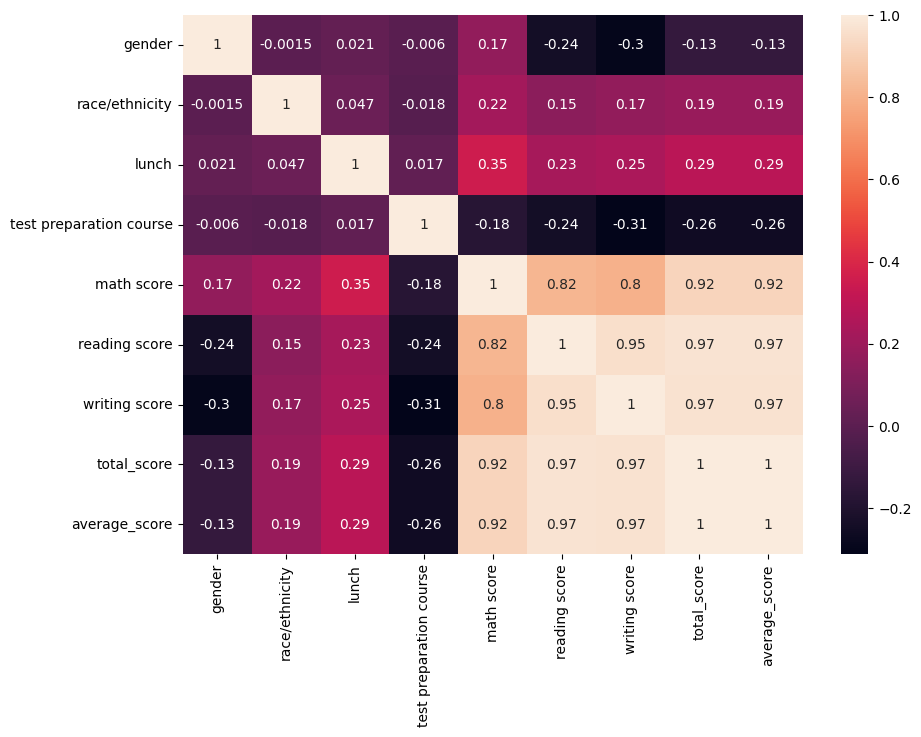

In [173]:
plt.figure(figsize= (10, 7))
sns.heatmap(df.corr(), annot = True)

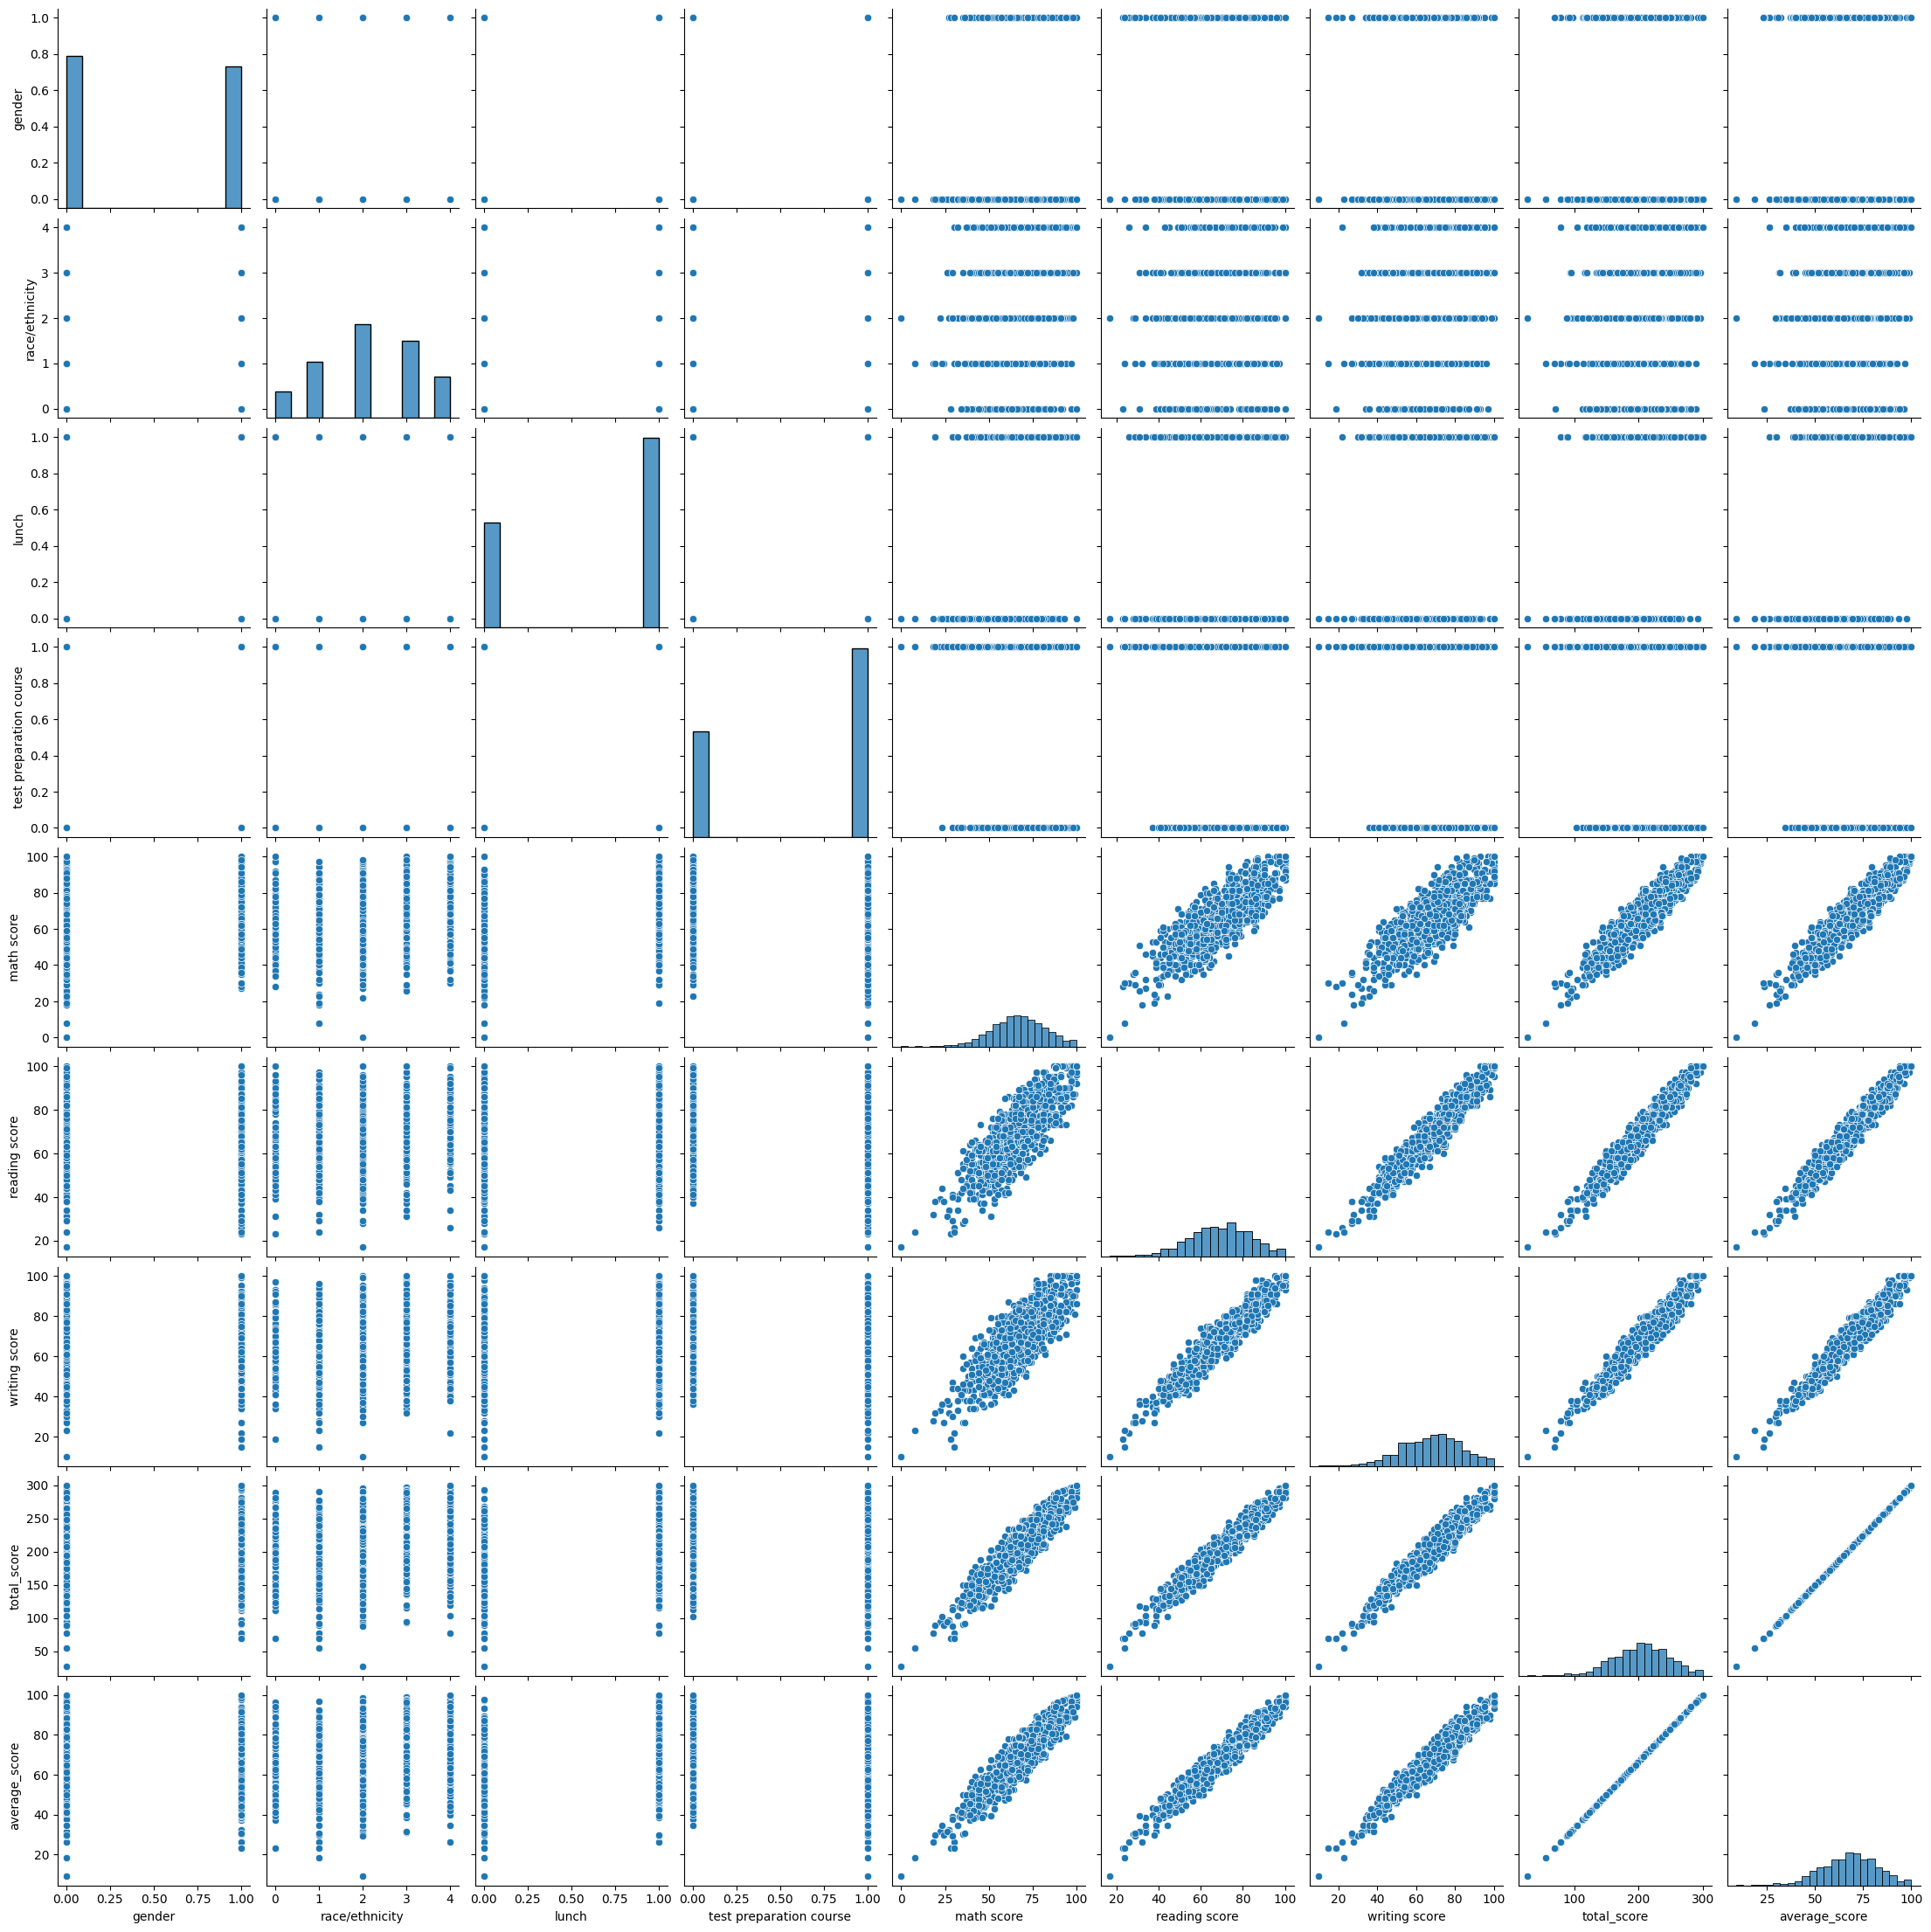

In [175]:
sns.pairplot(df)

# ***The performance for each student***

In [179]:
def categorized_performance(score):
  if score >= 270:
    return 'Excellent'
  elif score >= 240:
      return 'Good'
  elif score >= 210:
        return 'Fair'
  else:
      return 'Needs Improvment'

